In [1]:
import pandas as pd
import seaborn as sp
import numpy as np


In [2]:
df=pd.read_csv("/content/Student_Performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.select_dtypes(include=np.number).corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


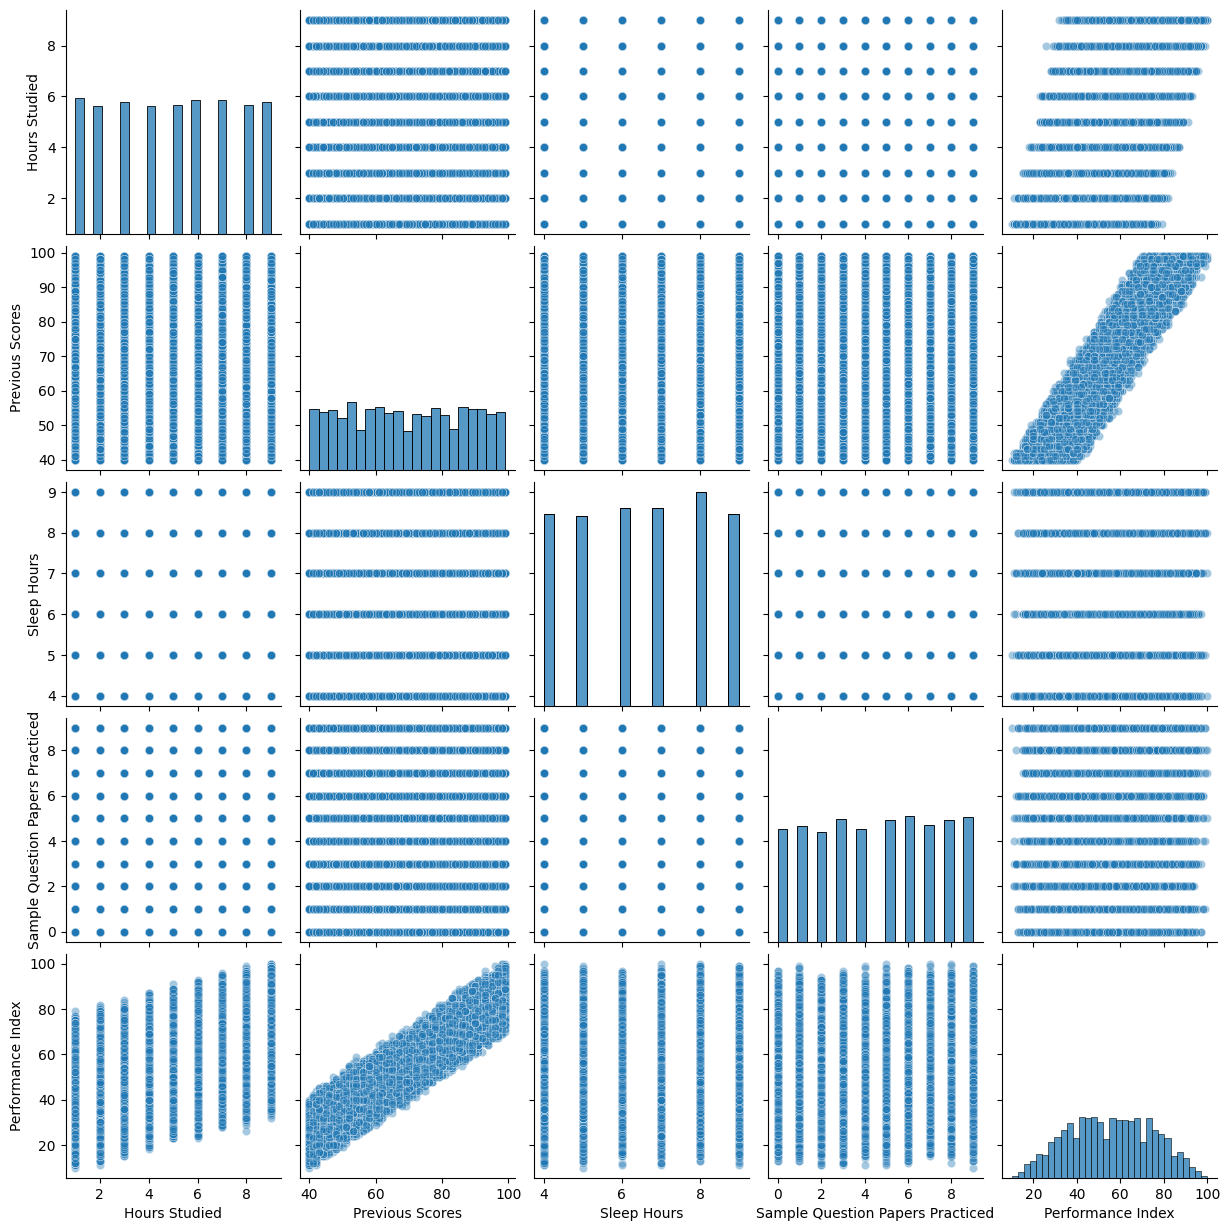

In [7]:
sp.pairplot(df,kind='scatter',plot_kws= {"alpha":0.4})

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=df[["Hours Studied","Previous Scores","Extracurricular Activities","Sleep Hours","Sample Question Papers Practiced"]]
y=df["Performance Index"]

# Convert 'Extracurricular Activities' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Extracurricular Activities'], drop_first=True)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm=LinearRegression()

In [13]:
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))


Ridge Regression
MSE: 4.066568738584127
R²: 0.989011047421848


In [19]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R²:", r2_score(y_test, y_pred_lasso))


Lasso Regression
MSE: 4.135885537855161
R²: 0.9888237349554849


In [20]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

y_pred_elastic = elastic.predict(X_test)

print("ElasticNet Regression")
print("MSE:", mean_squared_error(y_test, y_pred_elastic))
print("R²:", r2_score(y_test, y_pred_elastic))


ElasticNet Regression
MSE: 4.1018574728941175
R²: 0.9889156878563754


In [14]:
predicton=lm.predict(X_test)

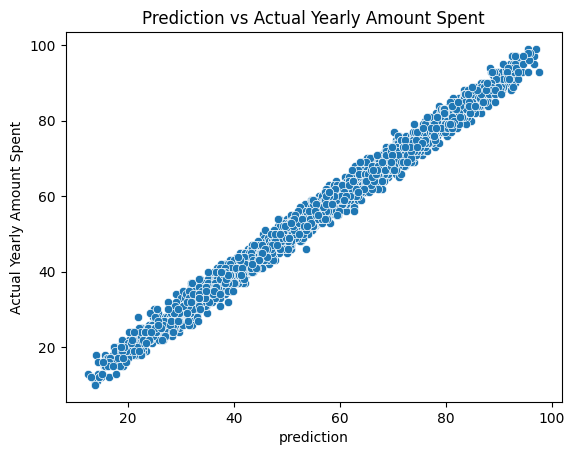

In [15]:
import matplotlib.pyplot as plt
sp.scatterplot(x=predicton,y=y_test)
plt.xlabel("prediction")
plt.ylabel("Actual Yearly Amount Spent")
plt.title("Prediction vs Actual Yearly Amount Spent")
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# y_test: actual values
# y_pred: predicted values from your model

# Example:
# y_test = [actual values]
# y_pred = model.predict(X_test)

# Generate predictions
y_pred = lm.predict(X_test)

# 1. MAE
mae = mean_absolute_error(y_test, y_pred)

# 2. MSE
mse = mean_squared_error(y_test, y_pred)

# 3. RMSE
rmse = np.sqrt(mse)

# 4. R-squared
r2 = r2_score(y_test, y_pred)

# Print all metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 1.6090437564045224
MSE: 4.066563824092683
RMSE: 2.016572295776346
R-squared: 0.9890110607021136


In [17]:


avg_session_length = float(input("Hours Studied"))
time_on_app = float(input("Previous Scores"))
time_on_website = float(input("Extracurricular Activities"))
length_of_membership = float(input("Sleep Hours"))
sample=int(input("Sample Question Papers Practiced"))
input_data = np.array([[avg_session_length, time_on_app, time_on_website, length_of_membership,sample]])
prediction = lm.predict(input_data)
print("Predicted Yearly Amount Spent:", prediction[0])

Hours Studied10
Previous Scores80
Extracurricular Activities2
Sleep Hours6
Sample Question Papers Practiced12
Predicted Yearly Amount Spent: 85.07683475016043


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
